# Lecture 17: Simulation

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

### Structure of simulation

**Purpose:** simulate sampling from a population, computing a statistic, and visualizing the bias and variability of that statistic

In [2]:
# ###########################
# # Template for a simulation
# # (This cell won't run.)
# ###########################

# # Create table to represent population
# population = Table().with_column('data', make_array(...))

# # Create empty array to accumulate statistics
# statistics = make_array()

# # "Tuning knobs" for simulation
# repetitions = ...
# sample_size = ...

# for _ in np.arange(repetitions):
#     sample = population.sample(sample_size).column('data')
#     statistic = ... # computed from sample
#     statistics = np.append(statistics, statistic)

# statistics

## Pea Flowers

In [3]:
pea_colors = make_array('Purple', 'Purple', 'Purple', 'White')
pea_colors

array(['Purple', 'Purple', 'Purple', 'White'], dtype='<U6')

**Question.** Assume Mendel's theories are correct.  The proportion of purple plants is .75.  What kind of number is that?

A. Population parameter  
B. Population statistic  
C. Sample parameter  
D. Sample statistic  
E. I don't know

<br/><br/><br/><br/><br/>

In [4]:
sample_size = 929

def get_sample():
    return Table().with_column('color', pea_colors).sample(sample_size).column('color')

In [5]:
get_sample()

array(['Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple', 'White', 'Purple', 'Purple', 'White', 'Purple', 'Purple',
       'Purple', 'White', 'White', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'White', 'Purple', 'White', 'Purple', 'White', 'White',
       'Purple', 'Purple', 'Purple', 'White', 'Purple', 'Purple',
       'Purple', 'White', 'White', 'White', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'White', 'Purple', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'Purple', 'White', 'White', 'Purple', 'Purple',
       'White', 'White', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple'

In [6]:
def proportion_purple(sample):
    return np.sum(sample == 'Purple') / len(sample)

In [7]:
proportion_purple(get_sample())  # sample statistic

0.767491926803014

**Discussion question.** Every time we run the cell above, we get a different statistic.  How variable is that statistic?  

<br/><br/><br/><br/><br/><br/><br/><br/>

### Another way to sample

In [8]:
pea_colors = Table().with_column('color', make_array('Purple', 'White'))
pea_colors

color
Purple
White


In [9]:
sample = pea_colors.sample(929, weights = make_array(.75, .25))
proportion_purple(sample.column('color'))

0.7481162540365985

### Simulation

In [10]:
# Create table to represent population
peas = Table().with_columns(
    'color', make_array('Purple', 'White'),
    'chance', make_array(.75, .25)
)
peas

color,chance
Purple,0.75
White,0.25


In [11]:
# Create empty array to accumulate statistics
proportions = make_array()

# "Tuning knobs" for simulation
repetitions = 5000
sample_size = 929

for _ in np.arange(repetitions):
    sample = peas.sample(sample_size, weights=peas.column('chance')).column('color')
    statistic = proportion_purple(sample)
    proportions = np.append(proportions, statistic)

proportions

array([0.75565124, 0.74381055, 0.7664155 , ..., 0.73196986, 0.75026911,
       0.77610334])

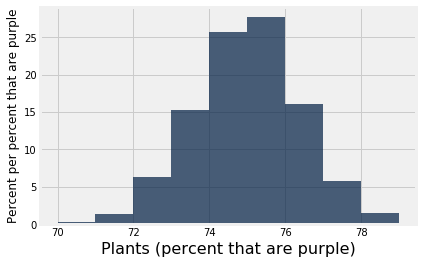

In [12]:
percents = Table().with_column('Plants', proportions * 100)
percents.hist(bins=np.arange(70, 80, 1), unit='percent that are purple')

## Comparing to observed data

In [13]:
observed_purples = 705
total_plants = 929
observed_percent_purple = 100 * observed_purples / total_plants
observed_percent_purple

75.8880516684607

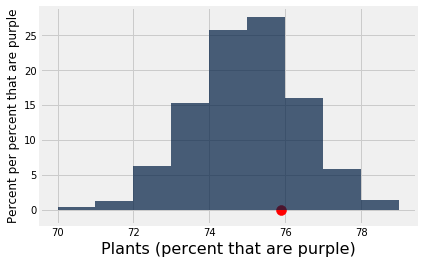

In [14]:
percents.hist(bins=np.arange(70, 80, 1), unit='percent that are purple')
plots.scatter(observed_percent_purple, 0, color='red', s=100);

## A different statistic

In [15]:
def mystery_statistic(sample):
    return abs(np.sum(sample == 'Purple') / len(sample) - 0.75)

**Question.** Describe that statistic in your own words.

<br/><br/><br/><br/><br/>

In [16]:
repetitions = 5000
sample_size = 929

statistics = make_array()

for _ in np.arange(repetitions):
    sample = peas.sample(sample_size, weights=peas.column('chance')).column('color')
    statistic = mystery_statistic(sample)
    statistics = np.append(statistics, statistic)

statistics

array([0.01749193, 0.02072121, 0.00242196, ..., 0.00780409, 0.00080732,
       0.00349839])

In [17]:
observed_statistic = abs(observed_purples / total_plants - 0.75)
observed_statistic

0.008880516684607098

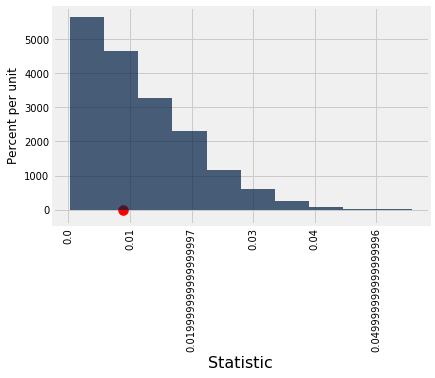

In [18]:
pred = Table().with_column('Statistic', statistics)
pred.hist()
plots.scatter(observed_statistic, 0, color='red', s=100);

## Yet another statistic

**Question.** What do you expect the histogram produced by the simulation below to look like?

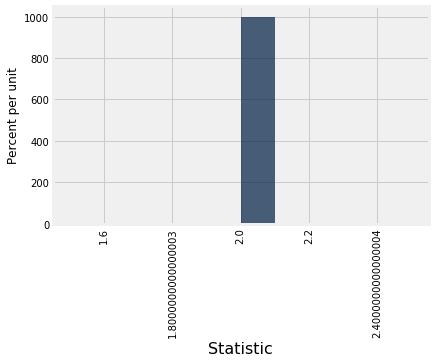

In [19]:
###############################################################
# A new statistic

def number_of_different_colors(sample):
    """
    Returns the number of different colors in sample.
    For example, would return 2 on the input 
      make_array('Purple', 'White').
    """
    return Table().with_column('color', sample).group('color').num_rows

###############################################################
# Everything below here is the same simulation we've been doing 

repetitions = 5000
sample_size = 929

statistics = make_array()

for _ in np.arange(repetitions):
    sample = peas.sample(sample_size, weights=peas.column('chance')).column('color')
    statistic = number_of_different_colors(sample)
    statistics = np.append(statistics, statistic)

###############################################################
# Plot a histogram of the simulated statistic
Table().with_column('Statistic', statistics).hist()

## Swain v. Alabama

In [20]:
swain = Table().with_columns(
    'Race', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

Race,Eligible,Panel
Black,26%,8%
Other,74%,92%


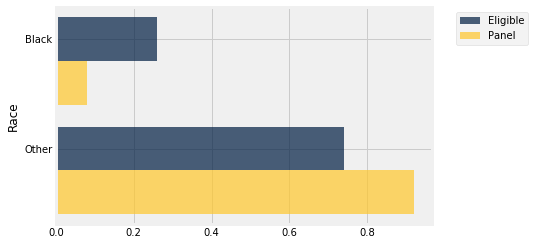

In [21]:
swain.barh('Race')

## Simulating

In [22]:
swain

Race,Eligible,Panel
Black,26%,8%
Other,74%,92%


**Question.** How could we write code to produce a new randomly sampled panel of 100 jurors?  Specifically, their race?  E.g., `array(['Black', 'Other', ..., 'Black'])`, with 100 elements in that array?

<br/><br/><br/><br/><br/>

In [23]:
random_panel = swain.select('Race').sample(100, weights=swain.column('Eligible'))
random_panel.column('Race')

array(['Other', 'Other', 'Other', 'Black', 'Other', 'Other', 'Other',
       'Other', 'Black', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Black', 'Black', 'Black', 'Black', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Black', 'Black',
       'Other', 'Other', 'Other', 'Black', 'Other', 'Black', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Black',
       'Other', 'Other', 'Other', 'Other', 'Black', 'Other', 'Other',
       'Black', 'Other', 'Other', 'Black', 'Other', 'Black', 'Black',
       'Other', 'Other', 'Black', 'Black', 'Black', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Black', 'Other', 'Other', 'Other',
       'Other', 'Other', 'Black', 'Other', 'Other', 'Other', 'Black',
       'Other', 'Black', 'Other', 'Other', 'Other', 'Other', 'Black',
       'Other', 'Other', 'Other', 'Other', 'Black', 'Black', 'Black',
       'Other', 'Black', 'Other', 'Black', 'Black', 'Other', 'Other',
       'Other', 'Bla

In [24]:
# Let's summarize that panel
counts = random_panel.group('Race')
counts

Race,count
Black,31
Other,69


In [25]:
proportions = counts.select('Race').with_column(
    'Random Panel', counts.column('count') / 100
)
proportions.set_format('Random Panel', PercentFormatter(0))

Race,Random Panel
Black,31%
Other,69%


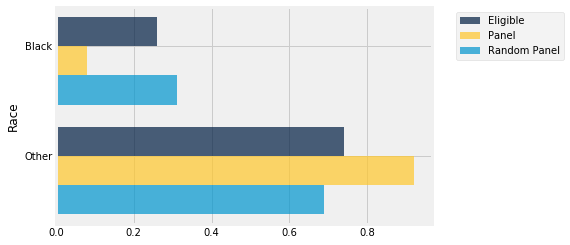

In [26]:
# For sake of comparison
swain.join('Race', proportions).barh('Race')

**Question.** Does the random panel look more like the actual panel?  Or more like the eligible population?

In [27]:
def random_jury_panel():   
    panel_size = 100
    panel = swain.select('Race').sample(panel_size, weights=swain.column('Eligible'))
    counts = panel.group('Race')
    proportions = counts.select('Race').with_column(
        'Random Panel', counts.column('count') / panel_size
    )
    proportions.set_format('Random Panel', PercentFormatter(0))
    return proportions

random_jury_panel()

Race,Random Panel
Black,21%
Other,79%


In [28]:
# Simulate 

proportion_black = make_array()

for _ in np.arange(1000): 
    sample = random_jury_panel()
    p = sample.where('Race', 'Black').column('Random Panel').item(0)
    proportion_black = np.append(proportion_black, p)

results = Table().with_column('Proportion black', proportion_black)
results

Proportion black
0.28
0.25
0.23
0.3
0.25
0.24
0.21
0.35
0.29
0.23


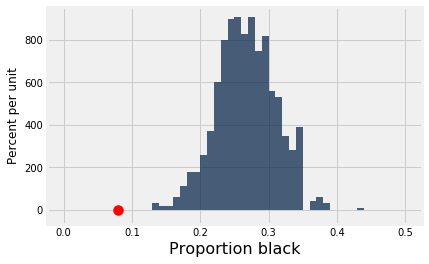

In [29]:
np.set_printoptions(legacy='1.13')

results.hist(bins = np.arange(0, .51, .01))
plots.scatter(.08, 0, color='red', s=100);